In [75]:
#FUNÇÃO PARA LIMPAR RESULTADOS
import numpy as np

def clear_results(valores, tol=1e-5):
    valores = np.array(valores)
    valores[np.abs(valores) < tol] = 0
    return valores

In [76]:
#CINEMÁTICA DIRETA SIMBÓLICA

#importar bibliotecas necessárias
from roboticstoolbox import ET, ERobot
import numpy as np
from spatialmath import SE3
import sympy as sp

#definindo o braço do robô

#parâmetros do braço
a2 = 0.6 
a3 = 0.2

e = ET.tz(qlim=[0, 0.170]) * ET.tz(0.300) * ET.Rz(qlim=[-np.pi, np.pi]) * ET.tx(a2) * ET.tx(a3) * ET.Rx(qlim=[-np.pi, np.pi]) * ET.Ry(np.pi/6) * ET.tz(-0.100) * ET.tx(0.100) * ET.tz(0.100)

#Transformação do braço num objeto ERobot
cookbot = ERobot(e)
print(cookbot)

#variáveis simbólicas
q1, q2, q3 = sp.symbols('q1 q2 q3')
pos_sim = (q1, q2, q3)

#definindo a cinemática direta simbólica
TE = cookbot.fkine([q1, q2, q3])
print("A cinemática direta simbólica é:")
print(TE)

#posição do end-effector
print("A posição do end-effector é:")
print(TE.t)


ERobot: , 3 joints (PRR)
┌──────┬────────┬───────┬────────┬────────────────────────────────────────┐
│ link │  link  │ joint │ parent │          ETS: parent to link           │
├──────┼────────┼───────┼────────┼────────────────────────────────────────┤
│    0 │ link0  │     0 │ BASE   │ tz(q0)                                 │
│    1 │ link1  │     1 │ link0  │ tz(0.3) ⊕ Rz(q1)                       │
│    2 │ link2  │     2 │ link1  │ tx(0.6) ⊕ tx(0.2) ⊕ Rx(q2)             │
│    3 │ @link3 │       │ link2  │ Ry(30°) ⊕ tz(-0.1) ⊕ tx(0.1) ⊕ tz(0.1) │
└──────┴────────┴───────┴────────┴────────────────────────────────────────┘

A cinemática direta simbólica é:
  -0.5*sin(q2)*sin(q3) + 0.866025403784439*cos(q2) -1.0*sin(q2)*cos(q3) 0.866025403784439*sin(q2)*sin(q3) + 0.5*cos(q2) -0.05*sin(q2)*sin(q3) + 0.886602540378444*cos(q2)  
  0.866025403784439*sin(q2) + 0.5*sin(q3)*cos(q2) 1.0*cos(q2)*cos(q3) 0.5*sin(q2) - 0.866025403784439*sin(q3)*cos(q2) 0.886602540378444*sin(q2) + 0.05*sin(q3)*co

In [77]:
int = (0, 0.9, 0.460)
joj = cookbot.fkine(int)
print(joj) 

   0.3645   -0.7019    0.612     0.5337    
   0.8164    0.557     0.1527    0.7083    
  -0.448     0.4439    0.776     0.2552    
   0         0         0         1         



In [78]:
#CINEMÁTICA INVERSA NUMÉRICA

#supondo um valor de posição final e inicial
pos_inicial = (0.9, 0, 0.300)
pos_inicial = SE3(pos_inicial)

pos_final = SE3(0.0, 0.9, 0.46) * SE3.RPY([180, 0, 90], order='zyx', unit='deg')
print(pos_final)
#cinemática inversa numérica
sol1 = cookbot.ikine_LM(pos_inicial)
sol2 = cookbot.ikine_LM(pos_final)
if sol1.success == True:
    print("A solução numérica da cinemática inversa para posição inicial é:")
    print(clear_results(sol1.q))
else:
    print("Não foi possível encontrar uma solução numérica para a posição inicial.")

if sol2.success == True:
    print("A solução numérica da cinemática inversa para posição final é:")
    print(clear_results(sol2.q))
else:
    print("Não foi possível encontrar uma solução numérica para a posição final.")



   0         1         0         0         
   1         0         0         0.9       
   0         0        -1         0.46      
   0         0         0         1         

Não foi possível encontrar uma solução numérica para a posição inicial.
Não foi possível encontrar uma solução numérica para a posição final.


A posição inicial do end-effector é: [0.88660254 0.         0.25      ]


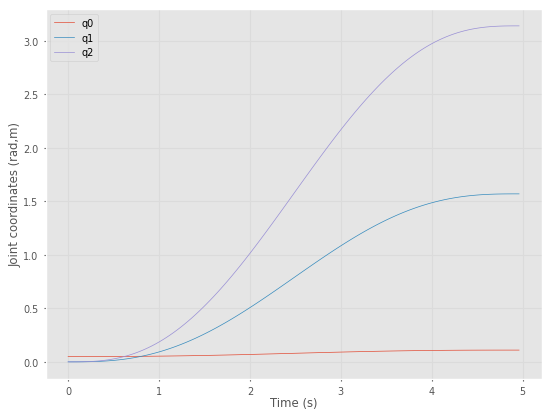

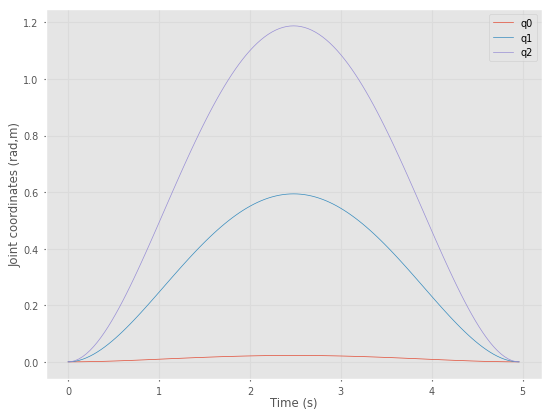

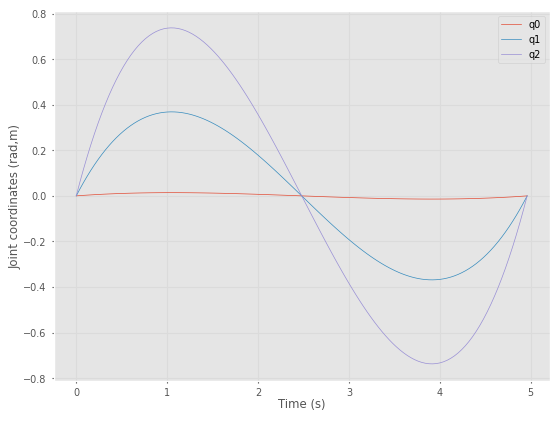

[<AxesSubplot:xlabel='Time (s)', ylabel='Joint coordinates (rad,m)'>]

In [79]:
#TRAJETÓRIAS TESTE
from roboticstoolbox import mtraj, quintic, xplot

#intervalo de tempo
t = np.arange(0, 5, 0.04) 

#TRAJETÓRIAS
POS0 = cookbot.fkine([0, 0, 0])
print("A posição inicial do end-effector é:", POS0.t)

traj1 = mtraj(quintic, sol1.q, sol2.q, t)

xplot(t, traj1.q)
xplot(t, traj1.qd)
xplot(t, traj1.qdd)

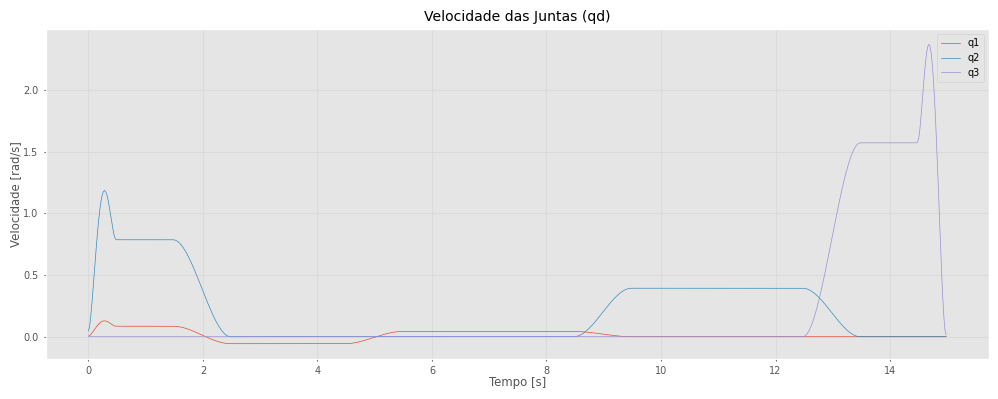

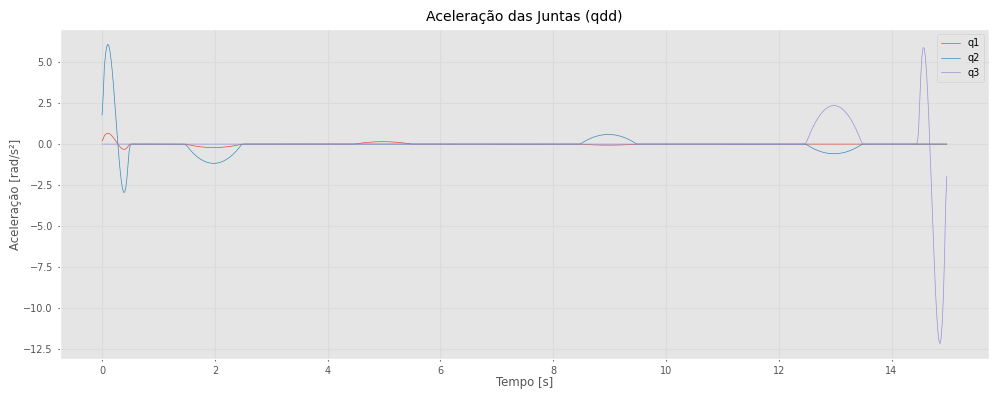

In [80]:
#TESTE
# Supondo que traj_final = mstraj(...)
q = traj_final.q
t = traj_final.t

# Derivada numérica para obter velocidade
qd = np.gradient(q, t, axis=0)

# Derivada numérica para obter aceleração
qdd = np.gradient(qd, t, axis=0)

import matplotlib.pyplot as plt
import numpy as np

# Supondo que você já tem:
# traj_final = mstraj(...)

q = traj_final.q      # Posições articulares, shape=(N, n_juntas)
t = traj_final.t      # Vetor de tempo, shape=(N,)

# Derivada numérica para obter velocidades e acelerações
qd = np.gradient(q, t, axis=0)
qdd = np.gradient(qd, t, axis=0)

# Plot das velocidades (qd)
plt.figure(figsize=(10,4))
for i in range(q.shape[1]):
    plt.plot(t, qd[:, i], label=f'q{i+1}')
plt.title('Velocidade das Juntas (qd)')
plt.xlabel('Tempo [s]')
plt.ylabel('Velocidade [rad/s]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot das acelerações (qdd)
plt.figure(figsize=(10,4))
for i in range(q.shape[1]):
    plt.plot(t, qdd[:, i], label=f'q{i+1}')
plt.title('Aceleração das Juntas (qdd)')
plt.xlabel('Tempo [s]')
plt.ylabel('Aceleração [rad/s²]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [81]:
#JACOBIANO E ANALISE DE SINGULARIDADE
from roboticstoolbox import jsingu
import sympy as simpy
import numpy.linalg 
#componente translacional do end-effector
p = TE.t

#definindo as variáveis simbólicas para o jacobiano
q = pos_sim

#definindo o jacobiano simbólico
J = simpy.Matrix(p).jacobian(q)
print("O Jacobiano simbólico é:")
print(J)


#como a jacobiana não é quadrada, não é possível inverter
#então, vamos calcular a pseudo-inversa

#from roboticstoolbox import pinv

O Jacobiano simbólico é:
Matrix([[0, -0.886602540378444*sin(q2) - 0.05*sin(q3)*cos(q2), -0.05*sin(q2)*cos(q3)], [0, -0.05*sin(q2)*sin(q3) + 0.886602540378444*cos(q2), 0.05*cos(q2)*cos(q3)], [1.00000000000000, 0, 0.05*sin(q3)]])
